In [5]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Read the data into Jupyter Environment – 2 Marks

In [32]:
df=pd.read_csv('Cricket.csv',encoding='cp1252')

In [33]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [34]:
df.info()# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
Player    79 non-null object
Span      79 non-null object
Mat       79 non-null int64
Inns      79 non-null int64
NO        79 non-null int64
Runs      79 non-null int64
HS        79 non-null object
Ave       79 non-null float64
BF        79 non-null int64
SR        79 non-null float64
100       79 non-null int64
50        79 non-null int64
0         79 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [35]:
df.HS[df.HS.str.isdigit()==False].unique()#show  other than digits

array(['200*', '137*', '161*', '141*', '183*', '153*', '162*', '152*',
       '132*', '134*', '120*', '131*', '119*', '145*', '108*', '188*',
       '189*', '142*', '139*', '127*', '174*', '181*', '140*', '124*',
       '113*', '185*', '116*', '237*', '109*', '144*', '150*', '133*',
       '96*'], dtype=object)

# Regular Expression for filtering

In [36]:
docs = df['HS'].index
docs=df["HS"]

In [37]:
docs

0     200*
1      169
2      164
3      189
4      144
5     137*
6      139
7      183
8      153
9      169
10    161*
11    141*
12     172
13    183*
14    153*
15    162*
16     145
17     215
18     194
19     150
20     150
21    152*
22    132*
23     173
24     219
25     183
26     175
27     124
28    134*
29     130
      ... 
49    181*
50     166
51     145
52     122
53     121
54    140*
55    119*
56    120*
57    124*
58    113*
59    185*
60     154
61    116*
62     112
63    237*
64    109*
65     264
66     141
67     119
68    144*
69    145*
70    150*
71    131*
72    133*
73    119*
74    133*
75     96*
76    120*
77     156
78     112
Name: HS, Length: 79, dtype: object

In [38]:
docs=docs.str.replace('[*]', '')# regular expression

In [39]:
docs

0     200
1     169
2     164
3     189
4     144
5     137
6     139
7     183
8     153
9     169
10    161
11    141
12    172
13    183
14    153
15    162
16    145
17    215
18    194
19    150
20    150
21    152
22    132
23    173
24    219
25    183
26    175
27    124
28    134
29    130
     ... 
49    181
50    166
51    145
52    122
53    121
54    140
55    119
56    120
57    124
58    113
59    185
60    154
61    116
62    112
63    237
64    109
65    264
66    141
67    119
68    144
69    145
70    150
71    131
72    133
73    119
74    133
75     96
76    120
77    156
78    112
Name: HS, Length: 79, dtype: object

In [40]:
df["HS"]=docs

In [41]:
df.HS[df.HS.str.isdigit()==False].unique()# lets check for conformation

array([], dtype=object)

# type casting

In [42]:
df['HS']=df.HS.astype('float')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
Player    79 non-null object
Span      79 non-null object
Mat       79 non-null int64
Inns      79 non-null int64
NO        79 non-null int64
Runs      79 non-null int64
HS        79 non-null float64
Ave       79 non-null float64
BF        79 non-null int64
SR        79 non-null float64
100       79 non-null int64
50        79 non-null int64
0         79 non-null int64
dtypes: float64(3), int64(8), object(2)
memory usage: 8.1+ KB


# standardize the variables - 2 marks

# Zscore transformation

In [75]:
df.columns

Index(['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR',
       '100', '50', '0'],
      dtype='object')

clustring Analysis (k-Means)is done only on all variables except Players,span variables because these are object.we need to convert dummies but no use converting beccause of domain knowledge because there is no constant number of uniques items of respective attributes ie  day by day possiblity of diferent names,differnt span is there.

In [76]:
from scipy.stats import zscore
x = df.loc[:,['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR','100', '50', '0']].apply(zscore) 

In [77]:
x.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502


In [78]:
df.Span.nunique()

65

In [79]:
df.Span.value_counts()

1992-2003    3
2002-2015    2
1992-2000    2
1982-1999    2
2005-2017    2
2007-2017    2
1975-1991    2
1996-2011    2
1990-2007    2
2008-2017    2
2006-2017    2
2000-2015    2
2004-2015    2
1989-2012    1
1994-2004    1
2005-2015    1
2002-2013    1
1978-1994    1
1994-2011    1
1992-2006    1
1984-1995    1
1989-2011    1
1993-2003    1
1993-2008    1
1975-1996    1
1992-2007    1
1984-1994    1
1987-2003    1
1984-2003    1
1999-2015    1
            ..
1985-1997    1
2000-2013    1
2001-2011    1
1999-2013    1
1996-2015    1
1986-2002    1
1998-2015    1
1985-2000    1
1998-2010    1
2004-2012    1
2009-2017    1
2004-2017    1
1996-2008    1
1986-1999    1
1992-2010    1
2003-2013    1
1998-2009    1
2002-2016    1
1991-2007    1
1989-2003    1
2003-2017    1
1996-2010    1
1999-2016    1
1995-2007    1
1995-2012    1
2003-2015    1
1994-2007    1
1999-2017    1
2000-2016    1
1988-2002    1
Name: Span, Length: 65, dtype: int64

In [80]:
df.Player.nunique()

79

# Find out the optimal number of clusters - 3 Marks

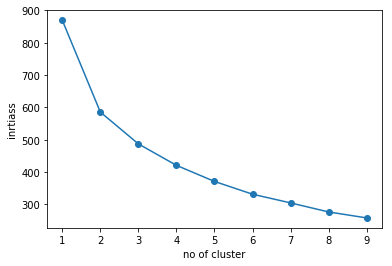

In [81]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
x
ks=range(1,10)
inertias=[]
for k in ks:
    # define the model
    model=KMeans(n_clusters=k)
    # fit the model
    model.fit(x)
    # append the inertia
    inertias.append(model.inertia_)
plt.plot(ks,inertias,'-o')
plt.xlabel('no of cluster')
plt.ylabel('inrtiass')
plt.xticks(ks)
plt.show()

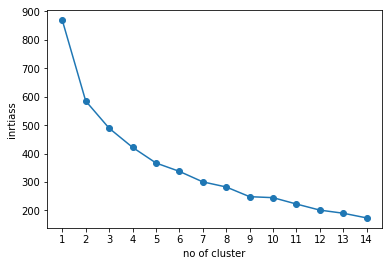

In [82]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
x
ks=range(1,15)
inertias=[]
for k in ks:
    # define the model
    model=KMeans(n_clusters=k)
    # fit the model
    model.fit(x)
    # append the inertia
    inertias.append(model.inertia_)
plt.plot(ks,inertias,'-o')
plt.xlabel('no of cluster')
plt.ylabel('inrtiass')
plt.xticks(ks)
plt.show()

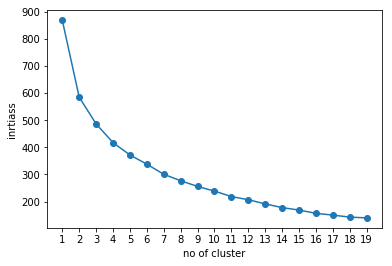

In [83]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
x
ks=range(1,20)
inertias=[]
for k in ks:
    # define the model
    model=KMeans(n_clusters=k)
    # fit the model
    model.fit(x)
    # append the inertia
    inertias.append(model.inertia_)
plt.plot(ks,inertias,'-o')
plt.xlabel('no of cluster')
plt.ylabel('inrtiass')
plt.xticks(ks)
plt.show()

# Inference

# . Perform K-Means clustering - 4 Marks

In [84]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=10)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [85]:
labels=model.predict(x)

In [89]:
labels

array([6, 0, 0, 8, 8, 0, 0, 0, 0, 4, 4, 4, 9, 4, 4, 5, 4, 9, 9, 4, 4, 4,
       4, 9, 9, 5, 9, 3, 7, 4, 4, 4, 1, 7, 5, 7, 7, 7, 1, 2, 7, 7, 2, 7,
       7, 7, 2, 7, 7, 2, 3, 2, 7, 1, 7, 7, 1, 1, 1, 2, 7, 1, 1, 2, 1, 2,
       2, 1, 1, 7, 2, 7, 7, 7, 2, 1, 1, 2, 1])

# . Attach clustered to each row - 5 Marks

In [91]:
x.columns

Index(['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0'], dtype='object')

In [92]:
df.columns

Index(['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR',
       '100', '50', '0'],
      dtype='object')

In [93]:
df1=x
df1.columns

Index(['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0'], dtype='object')

In [95]:
df1['Player']=df.iloc[df1.index]['Player']

In [101]:
df1['Span']=df.iloc[df1.index]['Span']

In [102]:
labels=pd.Series(labels)

In [103]:
labels.head()

0    6
1    0
2    0
3    8
4    8
dtype: int32

In [104]:
df1['labels']=labels

In [105]:
df1.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Player,Span,labels
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,SR Tendulkar (INDIA),1989-2012,6
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,KC Sangakkara (Asia/ICC/SL),2000-2015,0
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,RT Ponting (AUS/ICC),1995-2012,0
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,ST Jayasuriya (Asia/SL),1989-2011,8
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,DPMD Jayawardene (Asia/SL),1998-2015,8


# . Find out which cluster Chris Gayle Belongs to? -7 Marks

In [106]:
df1.columns

Index(['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0',
       'Player', 'Span', 'labels'],
      dtype='object')

In [107]:
df1.labels[df1.Player=='Chris Gayle'] # let may be spelling mistake check it

Series([], Name: labels, dtype: int32)

In [112]:
df1.Player.head(50)

0             SR Tendulkar (INDIA)
1      KC Sangakkara (Asia/ICC/SL)
2             RT Ponting (AUS/ICC)
3          ST Jayasuriya (Asia/SL)
4       DPMD Jayawardene (Asia/SL)
5        Inzamam-ul-Haq (Asia/PAK)
6           JH Kallis (Afr/ICC/SA)
7          SC Ganguly (Asia/INDIA)
8        R Dravid (Asia/ICC/INDIA)
9                 BC Lara (ICC/WI)
10                 TM Dilshan (SL)
11      Mohammad Yousuf (Asia/PAK)
12          AC Gilchrist (AUS/ICC)
13           MS Dhoni (Asia/INDIA)
14            M Azharuddin (INDIA)
15         AB de Villiers (Afr/SA)
16                PA de Silva (SL)
17               CH Gayle (ICC/WI)
18               Saeed Anwar (PAK)
19              S Chanderpaul (WI)
20       Yuvraj Singh (Asia/INDIA)
21                  DL Haynes (WI)
22                MS Atapattu (SL)
23                  ME Waugh (AUS)
24       V Sehwag (Asia/ICC/INDIA)
25                 V Kohli (INDIA)
26                   HH Gibbs (SA)
27    Shahid Afridi (Asia/ICC/PAK)
28             SP Fl

In [124]:
df1.Player.tail(30)

49        ML Hayden (AUS/ICC)
50           BB McCullum (NZ)
51             DM Jones (AUS)
52              DC Boon (AUS)
53             JN Rhodes (SA)
54      Mohammad Hafeez (PAK)
55          Rameez Raja (PAK)
56             RR Sarwan (WI)
57       EJG Morgan (ENG/IRE)
58             CL Hooper (WI)
59            SR Watson (AUS)
60        Tamim Iqbal (BDESH)
61           SK Raina (INDIA)
62             WJ Cronje (SA)
63            MJ Guptill (NZ)
64           MEK Hussey (AUS)
65          RG Sharma (INDIA)
66              IR Bell (ENG)
67           A Jadeja (INDIA)
68            DR Martyn (AUS)
69           BRM Taylor (ZIM)
70          G Gambhir (INDIA)
71         ADR Campbell (ZIM)
72            MN Samuels (WI)
73           RS Mahanama (SL)
74          CG Greenidge (WI)
75        Misbah-ul-Haq (PAK)
76       PD Collingwood (ENG)
77            A Symonds (AUS)
78    Abdul Razzaq (Asia/PAK)
Name: Player, dtype: object

In [115]:
df1[df1.Player=='CH Gayle (ICC/WI)'] # let check may be string quotations position is wrong

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Player,Span,labels


In [118]:
df1.Player[df1.index==17]# we absorved that 17 index has this index then do for conformation

17    CH Gayle (ICC/WI)
Name: Player, dtype: object

In [129]:
df1[df1.index==17]

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Player,Span,labels
17,0.324436,0.478797,-0.909829,0.632125,2.114969,-0.202889,0.362226,0.589588,1.298783,0.034279,1.655336,CH Gayle (ICC/WI),1999-2015,9


In [122]:
df1[df1.index==17].labels


17    9
Name: labels, dtype: int32

# Answer

# . Find out the number of players who are in Gayle Cluster.  - 7 Marks

# value_count

In [126]:
df1.labels.value_counts()

7    20
1    14
4    13
2    12
9     6
0     6
5     3
8     2
3     2
6     1
Name: labels, dtype: int64

# boolean expression

In [127]:
df1.labels[df1.labels==9].count()

6

In [130]:
members is 9

NameError: name 'members' is not defined

In [131]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.
